In [28]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/bigdataleeky/python/main/data/mobile_phone.csv')
df.head()

,create_date,price,text,phone_model,factory_price,maker,price_index
0,2017-03-19 4 35 00 PM,550000.0,아이폰6플러스 블랙+애플라이트 64기가 팝니다 아이폰6플러스 블랙+애플라이트 64...,iphone 6 64gb,924000,apple,95.96
1,2016-10-26 12 08 00 PM,380000.0,갤럭시s6엣지 32기가 팝니다 직거래 갤럭시s6엣지 32기가 품명 갤럭시s6엣지제...,galaxy s6 edge 32gb,979000,samsung,103.05
2,2016-10-25 12 52 00 PM,300000.0,갤럭시s6 풀박스로 팝니다~~~ 새상품급 실기스조차 없어요 직접거래 구매한지 1...,galaxy s6 32gb,854000,samsung,103.05
3,2017-03-23 11 14 00 PM,290000.0,sk g5 티탄 폰 단품판매합니다 직접거래 sk g5 티탄 폰 단품판매합니다 올...,lg g5 32gb,836000,lg,95.96
4,2016-04-11 7 35 00 PM,280000.0,sony 엑스페리아 c5 ultra e5506 16gb 미사용 새제품 팝니다 1...,lg u 32gb,396000,lg,102.59


In [29]:
from datetime import datetime
import time

### create_date -unix time FUNCTION CREATE

In [30]:
def change_unixtime(str_date):
    timestamp = time.mktime(datetime.strptime(str_date, '%Y-%m-%d').timetuple())
    return timestamp

In [31]:
df['create_date'][0][:10]

'2017-03-19'

In [32]:
change_unixtime(df['create_date'][0][:10])

1489881600.0

In [33]:
df['create_date_unixtime'] = df['create_date'].apply(lambda x : change_unixtime(x[:10]))
df['create_date_unixtime'][:6]

0    1.489882e+09
1    1.477440e+09
2    1.477354e+09
3    1.490227e+09
4    1.460333e+09
5    1.490141e+09
Name: create_date_unixtime, dtype: float64

### min-max scaling => (각 요소 - 평균) / (최대값) - (최소값)

In [34]:
df['create_unixtime_scale'] = (df['create_date_unixtime'] - df['create_date_unixtime'].min()) / \
        (df['create_date_unixtime'].max() - df['create_date_unixtime'].min())
df[['create_date','create_date_unixtime','create_unixtime_scale']].head()

,create_date,create_date_unixtime,create_unixtime_scale
0,2017-03-19 4 35 00 PM,1.489882e+09,0.985612
1,2016-10-26 12 08 00 PM,1.477440e+09,0.640288
2,2016-10-25 12 52 00 PM,1.477354e+09,0.637890
3,2017-03-23 11 14 00 PM,1.490227e+09,0.995204
4,2016-04-11 7 35 00 PM,1.460333e+09,0.165468


### phone_model 분리

In [35]:
# df['phone_model'].apply(lambda x : x.split(' ')[-1]) # 모델명 끝에 용량만 가져오기
# df['phone_model'].apply(lambda x : x.split(' ')[:-1]) # 용량 아닌 나머지 모델명
df['phone_model_st'] = df['phone_model'].apply(lambda x : ' '.join(x.split(' ')[-1])) 
df['phone_model_detail'] = df['phone_model'].apply(lambda x : ' '.join(x.split(' ')[:-1])) 
df[['phone_model_st','phone_model_detail']].head()

,phone_model_st,phone_model_detail
0,6 4 g b,iphone 6
1,3 2 g b,galaxy s6 edge
2,3 2 g b,galaxy s6
3,3 2 g b,lg g5
4,3 2 g b,lg u


### 모델별 거래량

In [36]:
model_counts = df['phone_model'].value_counts()
model_detail_counts = df['phone_model_detail'].value_counts()

temp = [model_counts, model_detail_counts]

temp 변수명에 리스트로 두 데이터를 묶은 이유 : **두 피처 간의 기종별 거래 데이터를 확인하기 위해**

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


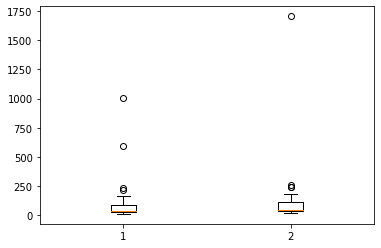

In [37]:
import matplotlib.pyplot as plt
plt.boxplot(temp)
plt.show()

### '모델명 + 용량'에 대한 출고가 

In [38]:
model_storage_factory_dic = {}
for idx, row in df.iterrows():
    print(idx, row)
    break

0 create_date                                         2017-03-19  4 35 00 PM
price                                                             550000.0
text                     아이폰6플러스 블랙+애플라이트 64기가 팝니다  아이폰6플러스 블랙+애플라이트 64...
phone_model                                                  iphone 6 64gb
factory_price                                                       924000
maker                                                                apple
price_index                                                          95.96
create_date_unixtime                                          1489881600.0
create_unixtime_scale                                             0.985612
phone_model_st                                                     6 4 g b
phone_model_detail                                                iphone 6
Name: 0, dtype: object


In [39]:
model_storage_factory_dic = {}
for idx, row in df.iterrows():
    model_concat = (row['phone_model_detail'], row['phone_model_st'])
    if model_concat in model_storage_factory_dic:
        pass
    model_storage_factory_dic[model_concat] = row['factory_price']

str(model_storage_factory_dic)[:50]

"{('iphone 6', '6 4 g b'): 924000, ('galaxy s6 edge"

## z_score...
- **평균으로부터 표준편차의 몇 배 만큼 떨어져 있는지를 보여주는 지수**
- **z = (x - mean) / std**
- **price z score : 어떤 데이터의 가격이 해당 기종의 평균에 비해 어느 정도 높거나 낮은지 알기 위함**

In [40]:
df['z_score_price'] = df.groupby('phone_model_detail')['price'].transform(lambda x : (x - x.mean()) / x.std())

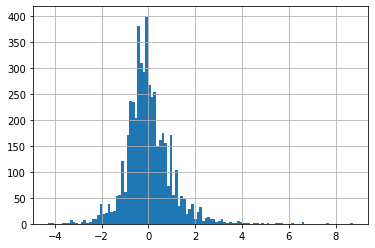

In [41]:
df['z_score_price'].hist(bins='auto')
plt.show()

###  상위 5% 하위 5% --> 4분위수 구하기

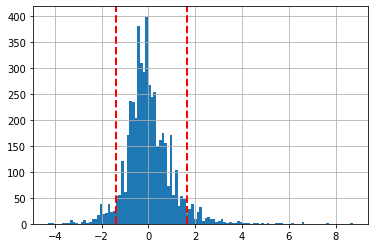

In [42]:
ax = df['z_score_price'].hist(bins='auto')
lower = df['z_score_price'].quantile(0.05) # 하위 5%
upper = df['z_score_price'].quantile(0.95) # 상위 5%
ax.axvline(x=lower, color='r', linestyle='dashed', linewidth=2)
ax.axvline(x=upper, color='r', linestyle='dashed', linewidth=2)

plt.show()

### 위 데이터를 가지고 결측치를 구하여 범위를 벗어난 나머지 데이터들은 제거하기 위한 과정...일종의 전처리

In [43]:
df['phone_model_detail'].head()

0          iphone 6
1    galaxy s6 edge
2         galaxy s6
3             lg g5
4              lg u
Name: phone_model_detail, dtype: object

#### 1. 값의 구간을 0, 1, 2로 나누어 라벨링 하기

In [44]:
lower, upper

(-1.3966616903783426, 1.666982156397844)

In [45]:
def makePriceLevel(price, lower, upper):
    if price > upper:
        return 2
    elif price > lower:
        return 1
    else:
        return 0;

In [46]:
df['lower_price'] = df.groupby('phone_model_detail')['price'].transform(lambda x : x.quantile(0.05))
df['upper_price'] = df.groupby('phone_model_detail')['price'].transform(lambda x : x.quantile(0.95))
df['price_level'] = df.apply(lambda x : makePriceLevel(x['price'], x['lower_price'], x['upper_price']), axis=1) # 데이터별로 구분해야 하므로

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4951 entries, 0 to 4950
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   create_date            4951 non-null   object 
 1   price                  4951 non-null   float64
 2   text                   4951 non-null   object 
 3   phone_model            4951 non-null   object 
 4   factory_price          4951 non-null   int64  
 5   maker                  4951 non-null   object 
 6   price_index            4951 non-null   float64
 7   create_date_unixtime   4951 non-null   float64
 8   create_unixtime_scale  4951 non-null   float64
 9   phone_model_st         4951 non-null   object 
 10  phone_model_detail     4951 non-null   object 
 11  z_score_price          4951 non-null   float64
 12  lower_price            4951 non-null   float64
 13  upper_price            4951 non-null   float64
 14  price_level            4951 non-null   int64  
dtypes: f

In [48]:
df.columns

Index(['create_date', 'price', 'text', 'phone_model', 'factory_price', 'maker',
       'price_index', 'create_date_unixtime', 'create_unixtime_scale',
       'phone_model_st', 'phone_model_detail', 'z_score_price', 'lower_price',
       'upper_price', 'price_level'],
      dtype='object')

### Text 데이터 사용하기 (한글 데이터 처리)
#### 불용어(Korean Stopwords) 리스트 확인 -->  및 제거
https://www.ranks.nl/stopwords/korean

In [49]:
df['text'].head()

0    아이폰6플러스 블랙+애플라이트 64기가 팝니다  아이폰6플러스 블랙+애플라이트 64...
1    갤럭시s6엣지 32기가 팝니다 직거래  갤럭시s6엣지 32기가 품명 갤럭시s6엣지제...
2    갤럭시s6 풀박스로 팝니다~~~ 새상품급  실기스조차 없어요  직접거래 구매한지 1...
3    sk  g5 티탄 폰 단품판매합니다  직접거래 sk g5 티탄 폰 단품판매합니다 올...
4     sony 엑스페리아 c5 ultra e5506 16gb  미사용 새제품 팝니다 1...
Name: text, dtype: object

In [50]:
df['text'][100]

'갤럭시 s3 3g 16g 3만원 팝니다  skt 모델입니다 초기 구성품 거의 있습니다순정 이어폰은 어디갔는지 모르겠네요모니터 성능에 따라 안 보일 수도 있습니다전면부 카메라 아래 쪽 액정 금가있습니다마찬가지로액정부 중앙 우측에서부터 홈버튼 위까지 금 있습니다우측 하단부 찍힘 자국 있습니다정상작동합니다연락주세요칠칠'

In [51]:
import pickle
import re

In [52]:
!pip install konlpy

In [53]:
from konlpy.tag import Okt # 한글 형태소 분석해주는 패키지

In [54]:
with open('stopwords.pkl', 'rb') as f:
    swords = pickle.load(f)

In [55]:
swords[:10]

['거래', '입니', '판매', '아이폰', '갤럭시', '골드', '팝', '만원', '폰', '시']

### 특수문자 제거, 숫자 형태의 문자

In [56]:
# df['text'][0].replace('[^ㄱ-ㅎㅏ-ㅣㅣ가-힣]','') # 한글 분류 시 정규식 사용
# re.compile('[^ㄱ-ㅎㅏ-ㅣㅣ가-힣]').findall(df['text'][0])   -->   ^ : 부터 제거한다는 의미

temp = df['text'][150]
temp = ''.join(re.compile('[ㄱ-ㅎㅏ-ㅣㅣ가-힣]').findall(temp))
temp

'와인폴더폰직접거래'

In [57]:
# 형태소를 분류하는 함수를 통해 단어 추출 --> java download !
okt = Okt()
okt.pos(temp)

' '.join([ i[1] for i in okt.pos(temp) if i[1] == 'Noun' and i[0] not in swords ])

'Noun Noun Noun'

In [58]:
def getNoun(x):
    temp = ''.join(re.compile('[ㄱ-ㅎㅏ-ㅣㅣ가-힣]').findall(x)) # 한글
    okt = Okt()
    okt.pos(temp)
    ' '.join([ i[1] for i in okt.pos(temp) if i[1] == 'Noun' and i[0] not in swords ])

In [59]:
df['text2'] = df['text'].apply(lambda x : getNoun(x))

In [60]:
df['text2'].head()

0    None
1    None
2    None
3    None
4    None
Name: text2, dtype: object